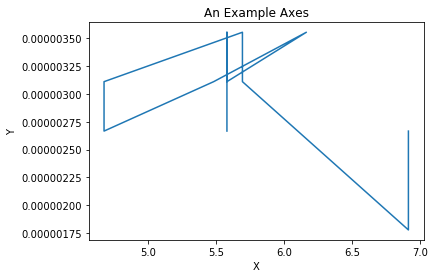

In [1]:
# to be written in regulated format, pay attention to <space>
# Aalto_EngineeringForHumans, 2 Fitts' Law GUI, 25.6.2017
# need Matplotlib package for empirical data visualization

# final check to delte useless package
import tkinter as tk
from tkinter import ttk
import time as tm
import numpy as np

import matplotlib.pyplot as plt

# (plan a)
# import plotly
# import plotly.plotly as py
# import plotly.tools as tls
# import plotly.graph_objs as go

# (plan b)
from IPython import display

#To plot offline in Jupyter notebook using Plotly package
# plotly.tools.set_credentials_file(username='avani_yu', api_key='gJM6kieccXOsPHo5Q5gx', stream_ids=['5rxatlat69'])
# plotly.offline.init_notebook_mode(connected=True)

# input parameters
global counter
counter = 0
global timeStamp
timeStamp = 0
global timeStampTemp
timeStampTemp = 0
global timeDelta
timeDelta = 0
global widthValue
widthValue = 2
global distanceValue
distanceValue = 40.0
# does idValue need to be global?
global idValue
idValue = 4.0
global areaWidth
areaWidth = 400
global areaCornerWidth
areaCornerWidth = 10
# list of Index of Difficulty
global idList
idList = []
# list of Movement Time
global mtList
mtList = []

def onScaleChanged(event):
    global widthValue
    global distanceValue
    global areaCornerWidth
    global idValue
    global idList
    #change the width of objects
    widthValue = int(varWidth.get())
    obj1.config(width=widthValue)
    obj2.config(width=widthValue)
    #change the distance between objects
    distanceValue = varDistance.get()
    areaCornerWidth = (areaWidth - distanceValue)/2
    frameDistance.config(width=distanceValue)
    frameNWCorner.config(width=areaCornerWidth)
    frameSWCorner.config(width=areaCornerWidth)
    frameNECorner.config(width=areaCornerWidth)
    frameSECorner.config(width=areaCornerWidth)
    idValue = np.log2(2*distanceValue/widthValue)
    #print (idValue)
    labelId.config(text="ID = %0.2f" %idValue)

def onStartClicked(event):
    global counter
    counter = 0
    scaleWidth.config(state=tk.DISABLED)
    scaleDistance.config(state=tk.DISABLED)

def cursorMovement(event):
    global timeStamp
    global timeStampTemp
    global counter
    global idList
    global mtList
    timeStamp = tm.clock()
    timeStampTemp = timeStamp
    if counter <= 10:
        # timing cursor one-way movement time in millisecond
        timeStamp = tm.clock()
        # timeDelta = (timeStamp - timeStampTemp)*1000
        timeDelta = (timeStamp - timeStampTemp)
        timeStampTemp = timeStamp
        tk.Label(frameTime, text="time = %0.2f ms" %timeDelta, anchor = tk.W).grid(row = 1 + counter, column=0, sticky=tk.N)
        mtList.append(timeDelta)
        mtArray = np.array(mtList)
        # print (mtList)
        # print ("---------------")
        idList.append(idValue)
        idArray = np.array(idList)
        # print (idList)
        # print ("-------------")

        # append new data to trace using Plotly packages
        # fittsLawStream.write(dict(x=idValue, y=timeDelta))

        # delete & replot using Matplotlib package
        fig = plt.figure()
        graph = fig.add_subplot(111)
        graph.set(title='An Example Axes', ylabel='Y', xlabel='X')
        graph.plot(idList, mtList)
        display.clear_output(wait=True)
        # display.display(plt.gcf())
        plt.show()

        # update plot using Matplotlib package

        # counting cursor back-and-forth movement number of times
        labelPointingCounter.config(text="counter = %d" %counter)
    if counter > 5:
        obj1.bind("<Enter>", lambda event, h=obj1: h.configure(bg='#224147'))
        obj2.bind("<Enter>", lambda event, h=obj2: h.configure(bg='#224147'))
        obj1.config(state=tk.DISABLED)
        obj2.config(state=tk.DISABLED)
        #linear regression
        #z = np.polyfit(idList, mtList, 1)
        #f = np.poly1d(z)
        #print (f)
    counter += 1

def onResetClicked(event):
    global counter
    counter = 0

root = tk.Tk()
root.title("Fitts' Law: Empirical Experiment GUI")
root.geometry("900x400")
root.resizable(width=False, height=False)
#experiment GUI
frameIdController = tk.Frame(root)
framePointingArea = tk.Frame(root, width=areaWidth, height=200, borderwidth=2, relief=tk.GROOVE)
frameTime = ttk.Labelframe(root, text='Delta Time', width=100)
frameIdController.grid(row=0, column=0, padx=10, pady=10)
ttk.Separator(root, orient=tk.VERTICAL).grid(row=0, column=1, rowspan=4, pady=10, sticky=tk.NS)
framePointingArea.grid(row=0, column=2, padx=10, pady=10)
framePointingArea.grid_propagate(0)
frameTime.grid(row=0, column=3, padx=10, pady=10)

#width, distance controller
varWidth = tk.DoubleVar()
varDistance = tk.DoubleVar()
scaleWidth = tk.Scale(frameIdController, from_=10, to=2, variable=varWidth, command=onScaleChanged)
scaleDistance = tk.Scale(frameIdController, from_=200, to=40, variable=varDistance, resolution=0.1, command=onScaleChanged)
labelWidth = tk.Label(frameIdController, text="Width")
labelDistance = tk.Label(frameIdController, text="Distance")
buttonStart = tk.Button(frameIdController, text="Start", padx=10, pady=10)
labelId = tk.Label(frameIdController, text="ID = %0.2f" %idValue)
labelCounter = tk.Label(frameIdController, text="Counter =")
#inputCounter = tk.
buttonReset = tk.Button(frameIdController, text="Reset", padx=10, pady=10)
scaleWidth.grid(row=0, column=0, padx=10, pady=10)
scaleDistance.grid(row=0, column=1, padx=10, pady=10)
buttonStart.grid(row=0, column=2, padx=10, pady=10, sticky=tk.S)
labelWidth.grid(row=1, column=0)
labelDistance.grid(row=1, column=1)
labelId.grid(row=2, columnspan=3, padx=10, pady=10, sticky=tk.W)
labelCounter.grid(row=3, column=0, padx=10, pady=10, sticky=tk.W)
buttonReset.grid(row=3, column=2, padx=10, pady=10)

#Pointing area
frameNWCorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=50)
frameSWCorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=50)
frameNECorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=50)
frameSECorner = tk.Frame(framePointingArea, width=areaCornerWidth, height=50)
frameDistance = tk.Frame(framePointingArea, width=distanceValue, height=100)
obj1=tk.Button(framePointingArea, bg='#224147')
obj2=tk.Button(framePointingArea, bg='#224147')
labelPointingCounter=tk.Label(framePointingArea, text="counter = %d" %counter)
frameNWCorner.grid(row=0, column=0)
frameNECorner.grid(row=0, column=4)
obj1.grid(row=1, column=1, sticky=tk.EW)
frameDistance.grid(row=1, column=2)
frameDistance.grid_propagate(0)
obj2.grid(row=1, column=3, sticky=tk.EW)
frameSWCorner.grid(row=2, column=0)
frameSECorner.grid(row=2, column=4)
labelPointingCounter.grid(row=2, column=2)

#when cursor hover over button, button change colour
obj1.bind("<Enter>", lambda event, h=obj1: h.configure(bg='#6fccdd'))
obj1.bind("<Leave>", lambda event, h=obj1: h.configure(bg='#224147'))
obj1.bind("<Button-1>", cursorMovement)
obj2.bind("<Enter>", lambda event, h=obj2: h.configure(bg='#6fccdd'))
obj2.bind("<Leave>", lambda event, h=obj2: h.configure(bg='#224147'))
obj2.bind("<Button-1>", cursorMovement)
buttonStart.bind("<Button-1>", onStartClicked)
buttonReset.bind("<Button-1>", onResetClicked)

#empirical data fitting
#to update plot in real-time, attach stream ID to a data trace
# stream_ids = tls.get_credentials_file()['stream_ids']
# stream_id = stream_ids[-1]
#make instance of stream ID object
# stream = dict(token=stream_id, maxpoints=80)
# trace = go.Scatter(
#     x = [],
#     y = [],
#     mode = 'markers',
#     stream = stream
# )
# data = go.Data([trace])
# layout = go.Layout(
#     title = "Fitts' Law empirical data fitting",
#     yaxis = dict(title='Movement Time (millisecond)'),
#     xaxis = dict(title='ID')
# )
# fig = go.Figure(data=data, layout=layout)
# online plotting
# plot_url = py.plot(fig, filename="Fitts' Law empirical data fitting")
#open a connection by stream link object
# fittsLawStream = py.Stream(stream_id=stream_id)
# fittsLawStream.open()

# using matplotlib to create figure
global fig
fig = plt.figure()
global graph
graph = fig.add_subplot(111)
graph.set(title='An Example Axes', ylabel='Y', xlabel='X')
graph.plot(idList, mtList)
# plt.show()

root.mainloop()
# fittsLawStream.close()
